# INFO371 Homework: Decision Trees 

Your task for this assignment is to explore a dataset using decision trees in order to give you some experience with trees and hyperparameter tuning. This lab asks you to play with classification trees and find the best combination of hyperparameters. Your goal is to try to get as good accuracy as possible! Keep in mind some of these experiemnts will take a while to run -- make sure you start early and give yourself enough time to finish the assignment. 

## Data
In this assignment, you will work with a dataset to try to predicit whether someone is at high or low risk of having a heart attack given some general health information about each person. The dataset has the following features: 

* Age : Age of the patient
* Sex : Sex of the patient (0 = Male, 1 = Female)
* exang: exercise induced angina (1 = yes; 0 = no)
* caa: number of major vessels (0-3)
* cp : Chest Pain type
     * Value 0: typical angina
     * Value 1: atypical angina
     * Value 2: non-anginal pain
     * Value 3: asymptomatic
* trtbps : resting blood pressure (in mm Hg)
* chol : cholestoral in mg/dl fetched via BMI sensor
* fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
* rest_ecg : resting electrocardiographic results
    * Value 0: normal
    * Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    * Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
* thalach : maximum heart rate achieved
* old peak: ST depression induced by exercise relative to rest
* slp: the slope of the peak exercise ST segment
    * 0 = unsloping
    * 1 = flat
    * 2 = downsloping
* thall : thalassemia
    * 0 = null
    * 1 = fixed defect
    * 2 = normal
    * 3 = reversable defect
* output : 0= less chance of heart attack 1= more chance of heart attack

Note that the column "output" is your label (i.e. the thing you are trying to predict). 

---
For some more information on some of the health definitions: 
* [Angina](https://www.nhs.uk/conditions/angina/#:~:text=Angina%20is%20chest%20pain%20caused,of%20these%20more%20serious%20problems): chest pain due to reduced blood flow to the heart muscles. There're 3 types of angina: stable angina, unstable angina, and variant angina.

* ECG: short for electrocardiogram, it's a routine test usually done to check the heart's electrical activity.

* [ST depression](https://litfl.com/st-segment-ecg-library/): a type of ST-segment abnormality. the ST segment is the flat, isoelectric part of the ECG and it represents the interval between ventricular depolarization and repolarization.

* Thalassemia: is a genetic blood disorder that is characterized by a lower rate of hemoglobin than normal.

## Dataset Exploration

1. load the dataset and ensure it looks good 


2. Split your dataset into your feature set and label set. Then do a random test/train split of 80/20. 


In [2]:
# code goes here
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split, cross_val_score
df = pd.read_csv('heart.csv.bz2')
print(df.head())
X = df.drop(columns='output')
X_train, X_test, y_train, y_test = train_test_split(X, df.output, test_size=0.2)

   age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   
3   56    1   1     120   236    0        1       178     0      0.8    2   
4   57    0   0     120   354    0        1       163     1      0.6    2   

   caa  thall  output  
0    0      1       1  
1    0      2       1  
2    0      2       1  
3    0      2       1  
4    0      2       1  


In [3]:
#baseline
from sklearn.metrics import accuracy_score
unique, counts = np.unique(df.output, return_counts=True)
print(dict(zip(unique, counts)))
print(accuracy_score(y_test, np.ones(len(y_test))))

{0: 138, 1: 165}
0.5245901639344263


training accuracy:  1.0
testing accuracy:  0.7049180327868853


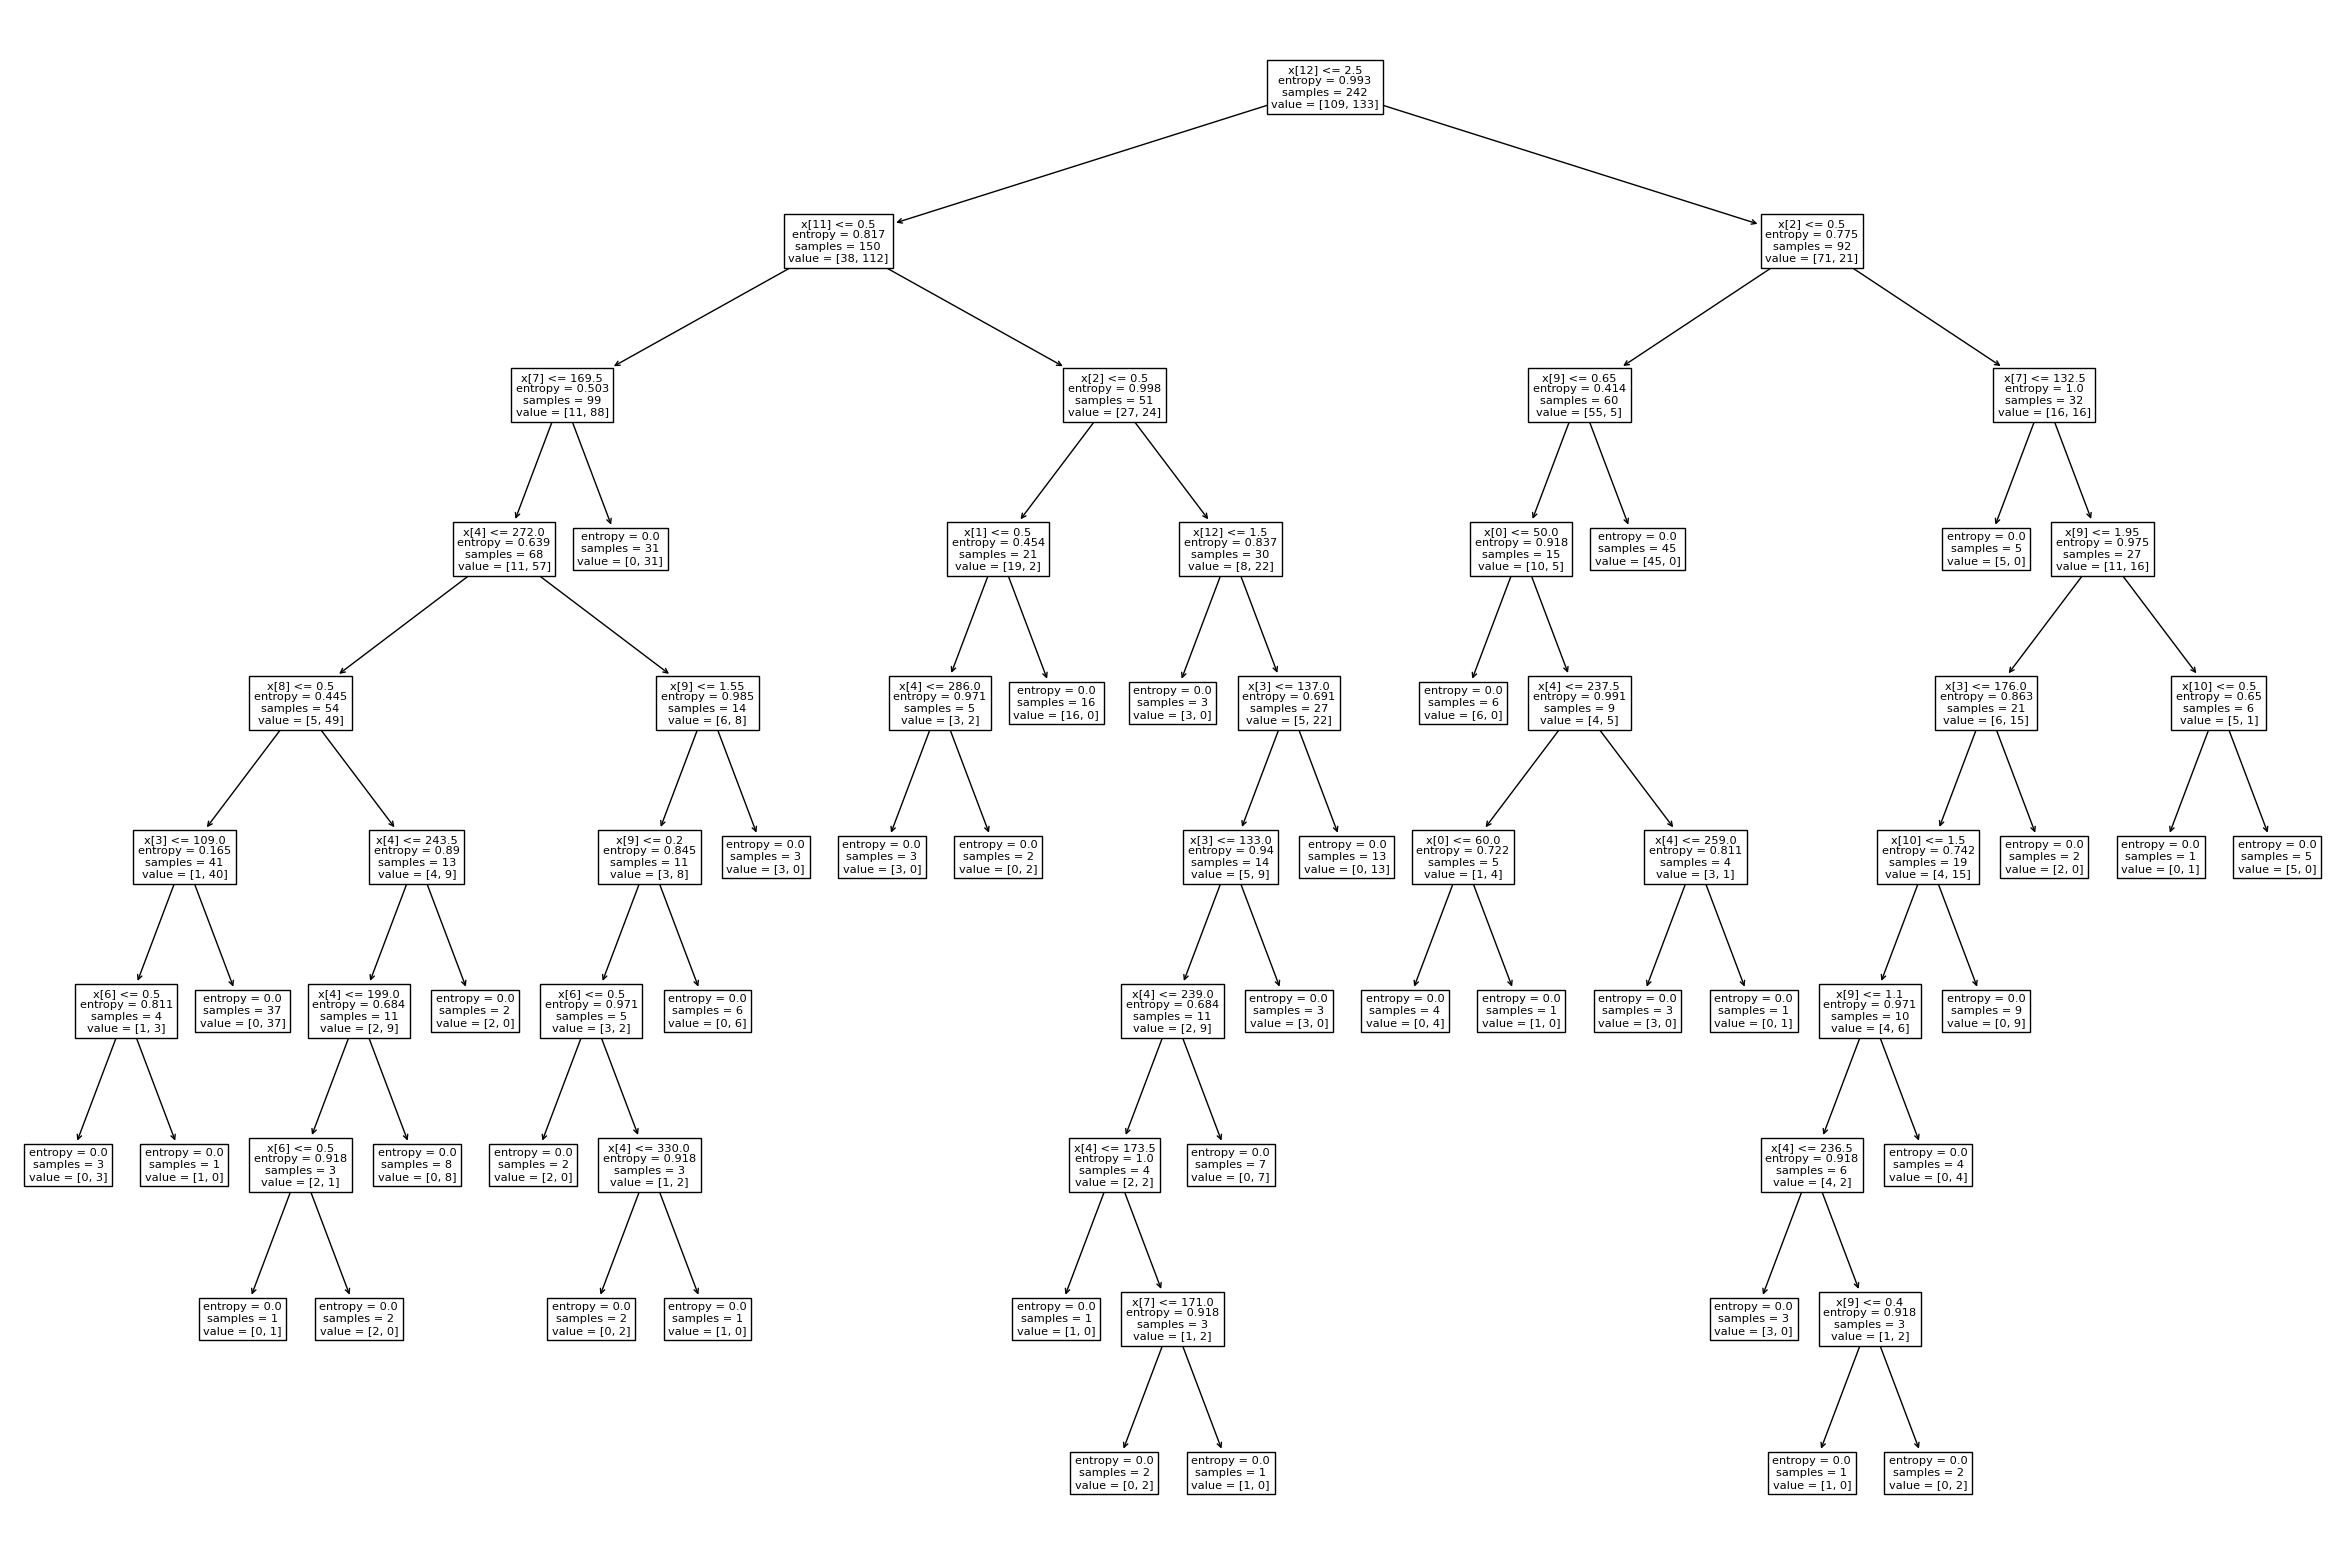

In [5]:
d_tree = tree.DecisionTreeClassifier(criterion='entropy')
m = d_tree.fit(X_train, y_train)
print("training accuracy: ", m.score(X_train, y_train))
print("testing accuracy: ", m.score(X_test, y_test))

import matplotlib.pyplot as plt
plt.figure(figsize=(30,20))
tree.plot_tree(m)
plt.show()

The results of the tree make decent sense to me on a logical basis. The first two features that are looked are chest pain followed by thalassemia. Chest pain is always associated culturally with heart attacks so the connection is straightforward. The tree looks potentially overfit though.

## Baseline Model Comparison 

3. Get a baseline accuracy using the naive model (i.e. a model where you assign the same label to all your testing data and that label is the one that appeared the most in your training data). 


4. Train a decision tree classifier using the default parameters except you should use the information gain/entropy metric for splitting. Report the training and testing accuracy. 


5. Plot the resulting decision tree and examine its structure. You can use the [function provided by scikitlearn library](https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html) to do so.  Do these features in that order make sense? Does this tell you anything interesting about your features? Did any of these suprise you? 


## Tuning the Model

6. Now lets try to examine average performance across different random splits. Run the model at least 10 times on different random splits of your data and report the average testing and training accuracy as well as the standard deviation. For an idea on how to do this, take a look at some of the lecture code we’ve done in class. Please don't use the cross-validation function here -- we want you to write this part yourself. 

    Hint – its probably a good idea to write a function to do this since you will be using this code to tune the various parameters. 



7. Now lets examine what happens as you increase the complexity of the model. Tune the model by examining various max-tree-depth. Plot the __average__ training and testing accuracy for each value of tree depth (NOTE - this means you'll have to run your model multiple times to get average accuracy. Use your function from step 6 to get this score). Accuracy should be on the y-axis and tree-depth should be on the x-axis. 



8. Explain what overfitting and underfitting is. How do you know when you are overfitting? Using your plot from question 7, explain when you are underfitting and overfitting your decision tree model. NOTE -- if you do not see overfitting, you may need to keep increasing the max-tree-depth. 


9. Now lets examine what happens when you tune a different parameter. Tune the model now by examining min_samples_split. Plot the __average__ training and testing accuracy for each value of min_samples_split. Accuracy should be on the y-axis and min_samples_split should be on the x-axis. Then explain on this plot where overfitting is happening. 

    Note -- we are tuning this parameter in isolation so you should set the max tree depth to whatever the default was. Don't use what you got in step 7.


10. Now lets examine what happens when you tune a different parameter. Tune the model now by examining min_samples_leaf. Plot the __average__ training and testing accuracy for each value of min_samples_leaf. Accuracy should be on the y-axis and min_samples_split should be on the x-axis. Then explain on this plot where overfitting is happening. 

    Note -- we are tuning this parameter in isolation so you should set the max tree depth to whatever the default was. Don't use what you got in step 7 or step 9.


11. Now that we've examined the hyperparamters in isolation, lets now perform a 3-D grid search across all three hyperparameters (see your lab notes on how to do this!). Use __average__ testing accuracy to chose your best parameters. How does the avarage testing accuracy with the all three best paramters perform? How does it compare to your completely untuned model (i.e. the one with all default parameters)? 



[train_avg, train_std], [test_avg, test_std] for 10 round k-fold:  ([0.7619834710743802, 0.011421714843872104], [0.7098360655737704, 0.05238211576613263])


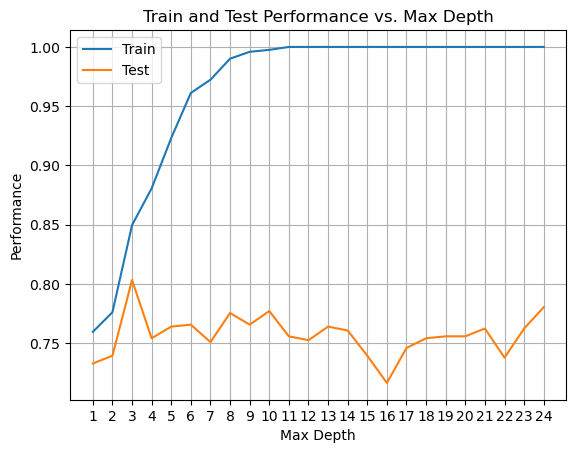

In [6]:
#k-fold validation
def avg_perf(k, depth=1, splits=2,leafs=1):
    train_acc = []
    test_acc = []

    for i in range(1,k+1):
        x_train, x_test, y_train, y_test = train_test_split(X, df.output, test_size=0.2)
        
        d_tree = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = depth, min_samples_split = splits, min_samples_leaf = leafs)
        m = d_tree.fit(x_train, y_train)
    
        train_acc.append(accuracy_score(y_train, m.predict(x_train)))
        test_acc.append(accuracy_score(y_test, m.predict(x_test)))

        train_avg = np.mean(np.array(train_acc))
        test_avg = np.mean(np.array(test_acc))
        train_std = np.std(np.array(train_acc))
        test_std = np.std(np.array(test_acc))

    return [train_avg, train_std], [test_avg, test_std]

print("[train_avg, train_std], [test_avg, test_std] for 10 round k-fold: ", avg_perf(10))


#max_depth
depth_data = []
for depth in range(1,25):
    depth_data.append(avg_perf(10, depth))

train_avg = [x[0][0] for x in depth_data]
test_avg = [x[1][0] for x in depth_data]
max_depth = range(1, len(depth_data) + 1)

plt.plot(max_depth, train_avg, label='Train')
plt.plot(max_depth, test_avg, label='Test')

plt.xlabel('Max Depth')
plt.ylabel('Performance')
plt.title('Train and Test Performance vs. Max Depth')
plt.legend()
plt.grid(True)
plt.xticks(max_depth)
plt.show()

Overfitting is when the model begins to learn the data too closely, the issue with this is that the function approximation begins to incorporate standard noise as legitimate changes to the function which makes future use weaker. Underfitting is the disregard of real trends in the function. Overfitting can be seen when training accuracy rapidly rises to 100% which testing accuracy seems random and jagged as the model is not gaining any new information for the actual effects of the underlying function.

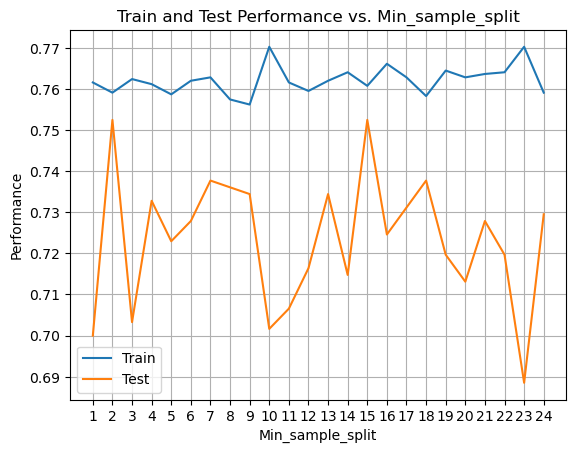

In [7]:
#min_sample_split
split_data = []
for split in range(1,25):
    split_data.append(avg_perf(10, splits=split))

train_avg = [x[0][0] for x in split_data]
test_avg = [x[1][0] for x in split_data]
splits = range(1, len(split_data) + 1)

plt.plot(splits, train_avg, label='Train')
plt.plot(splits, test_avg, label='Test')

plt.xlabel('Min_sample_split')
plt.ylabel('Performance')
plt.title('Train and Test Performance vs. Min_sample_split')
plt.legend()
plt.grid(True)
plt.xticks(max_depth)
plt.show()

Overfitting is very clearly occuring after min_sample_split is greater than 2. This can be seen as the testing accuracy begins to wildly swing as the resulting trees increase complexity and fail to follow underlying trends. instability in testing is closely tied to overfitting.

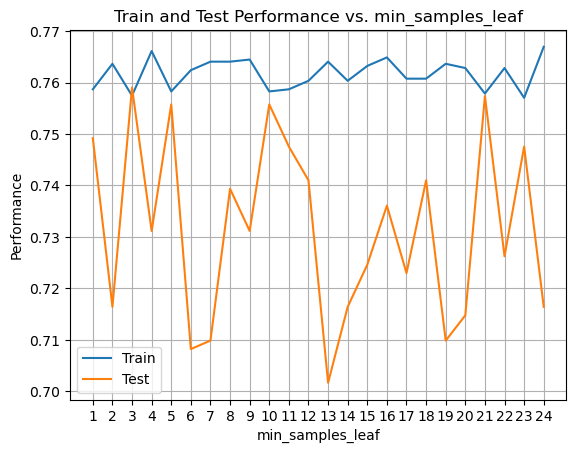

In [8]:
#min_samples_leaf
leaf_data = []
for leafs in range(1,25):
    leaf_data.append(avg_perf(10, leafs=leafs))

train_avg = [x[0][0] for x in leaf_data]
test_avg = [x[1][0] for x in leaf_data]
leafs = range(1, len(leaf_data) + 1)

plt.plot(leafs, train_avg, label='Train')
plt.plot(leafs, test_avg, label='Test')

plt.xlabel('min_samples_leaf')
plt.ylabel('Performance')
plt.title('Train and Test Performance vs. min_samples_leaf')
plt.legend()
plt.grid(True)
plt.xticks(max_depth)
plt.show()

Similar to the previous plot overfitting seems to clearly begin as soon as the model passes 3, after this point the data is increasingly chaotic and fails to follow any identifiable direction in testing score. 

In [9]:
best = 0
best_d = 0
best_s = 0
best_l = 0

for depth in range(1, 10):
    for splits in range(2, 10):
        for leafs in range(1, 10):
            train_avg, test_avg = avg_perf(k=10, depth=depth, splits=splits, leafs=leafs)
            score = test_avg[0]
            if score > best:
                best_s = splits
                best_d = depth
                best_l = leafs
                best = score
print('the best model over the given intervals = depth: ' + str(best_d) + ' min_samples_split: ' + str(best_s) + ' min_sample_leafs: ' + str(best_l) + ' score: ' + str(best))

the best model over the given intervals = depth: 3 min_samples_split: 7 min_sample_leafs: 5 score: 0.8278688524590164


The tuned model does signifcantly better than the default param model by close to a 10% increase in testing accuracy. The use of all three params also beats out isolated each individually.

## Compare Performance with Random Forests 

Now lets compare our performance by using a random forest model. 

12. Using the same test/train split as you used in Question 4, train a RandomForestClassifier model using default parameters and the ''entropy'' criterion. Report the testing and trainign accuracy. How does this model's accuracy compare to what you found in Question 4? 


13. Now using this random forest model, examine the imporance of each of the features in the dataset. You don't have to write this yourself, see this [documentaion](https://scikit-learn.org/stable/modules/feature_selection.html#tree-based-feature-selection) and this [example](https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html#sphx-glr-auto-examples-ensemble-plot-forest-importances-py) for how to do this in Python. How do these features compare to what you found in Question 5? Are they the same? Do any of these results suprise you? 


14. Now lets try to examine average performance across different random splits. Run the model at least 10 times on different random splits of your data and report the average testing and training accuracy as well as the standard deviation. Again, please don't use the cross-validation function here -- we want you to write this part yourself. You may use the same function as you did in Question 6 if you would like. 


15. Now lets examine what happens as you increase the complexity of the model by increasing the number of trees to include in our forest. Tune the model by examining a range of n_estimators. Plot the __average__ training and testing accuracy for each value of n_estimators (NOTE - this means you'll have to run your model multiple times to get average accuracy. Use your function from step 14 to get this score). Accuracy should be on the y-axis and n_estimators should be on the x-axis.


16. Using this plot explain what happens as you increase the number of trees in your forest. Are there trade-offs you have to consider?


17. Compare your results with Random Forest to the results you got with just one decision tree and write up your obervations and analysis. Which model are you finding is typically more accurate? Which model tended to overfit more? Are there any considerations you need to think about when chosing between Forests versus single trees? 

In [10]:
#standard forest
import sklearn.ensemble as e
d_tree = e.RandomForestClassifier(criterion = 'entropy')
m = d_tree.fit(X_train, y_train)
print("training accuracy: ", m.score(X_train, y_train))
print("testing accuracy: ", m.score(X_test, y_test))

training accuracy:  1.0
testing accuracy:  0.8032786885245902


The random forest does around 5% in testing accuracy than the standard tree.

In [11]:
feature_importance = m.feature_importances_
print("Feature Importance:")
for i, importance in enumerate(feature_importance):
    print("Feature", i, ":", importance)

Feature Importance:
Feature 0 : 0.09341518753512172
Feature 1 : 0.03842922923205032
Feature 2 : 0.11111269860041595
Feature 3 : 0.08020463627277677
Feature 4 : 0.09559690272153391
Feature 5 : 0.009168012734877497
Feature 6 : 0.019005684270566914
Feature 7 : 0.12025372915043031
Feature 8 : 0.05704853686987147
Feature 9 : 0.11014750416964668
Feature 10 : 0.05434349102883712
Feature 11 : 0.11239884815389
Feature 12 : 0.09887553925998148


This follows with my previous discoveries as feature index 2 and 12 are very important in the forest model as well.

In [12]:
def avg_perf_forest(k, n_estimators=100):
    train_acc = []
    test_acc = []

    for i in range(1, k+1):
        x_train, x_test, y_train, y_test = train_test_split(X, df.output, test_size=0.2)
        
        d_tree = e.RandomForestClassifier(criterion='entropy', n_estimators = n_estimators)
        m = d_tree.fit(x_train, y_train)
    
        train_acc.append(accuracy_score(y_train, m.predict(x_train)))
        test_acc.append(accuracy_score(y_test, m.predict(x_test)))

    train_avg = np.mean(np.array(train_acc))
    test_avg = np.mean(np.array(test_acc))
    train_std = np.std(np.array(train_acc))
    test_std = np.std(np.array(test_acc))
    return [train_avg, train_std], [test_avg, test_std]

print("[train_avg, train_std], [test_avg, test_std] for 10 round k-fold: ", avg_perf_forest(10))

[train_avg, train_std], [test_avg, test_std] for 10 round k-fold:  ([1.0, 0.0], [0.8344262295081967, 0.04045561534181333])


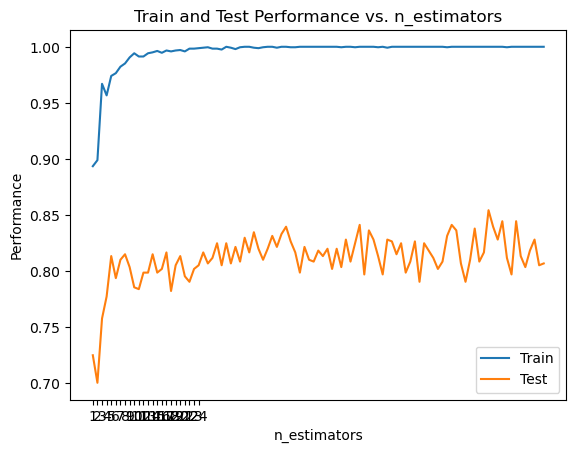

In [13]:
#max_depth
tree_data = []
for trees in range(1,100):
    tree_data.append(avg_perf_forest(10, trees))

train_avg = [x[0][0] for x in tree_data]
test_avg = [x[1][0] for x in tree_data]
max_trees = range(1, len(tree_data) + 1)

plt.plot(max_trees, train_avg, label='Train')
plt.plot(max_trees, test_avg, label='Test')

plt.xlabel('n_estimators')
plt.ylabel('Performance')
plt.title('Train and Test Performance vs. n_estimators')
plt.legend()
plt.xticks(max_depth)
plt.show()

Based off of the results of the analysis random forests seems to be more accuracte than trees and less prone to overfitting, but cost incredible amounts computationally. I have a very powerful computer running the code of this analysis and found that certain plots (like range(1,250) for trees would take multiple minutes). The Trade off being made is that when including k-fold validation, random forest, and parameter analysis you are looking at a complexity of O(M^4) or O(M^5) or higher depending on efficincies which slows the model to a crawl. Random forests will always be better if computational complexity can be ignored. That world does not exist though, and often times the complexity is not worth the 2-5% accuracy increase.